<a href="https://colab.research.google.com/github/Navneet-Nicer/Book-Recommendation-System/blob/main/Unsupervised_ML_Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <font size="+2" color='#053c96'><b> Project Name </b></font>

$\color{red}{\text{Book Recommendation System}}$

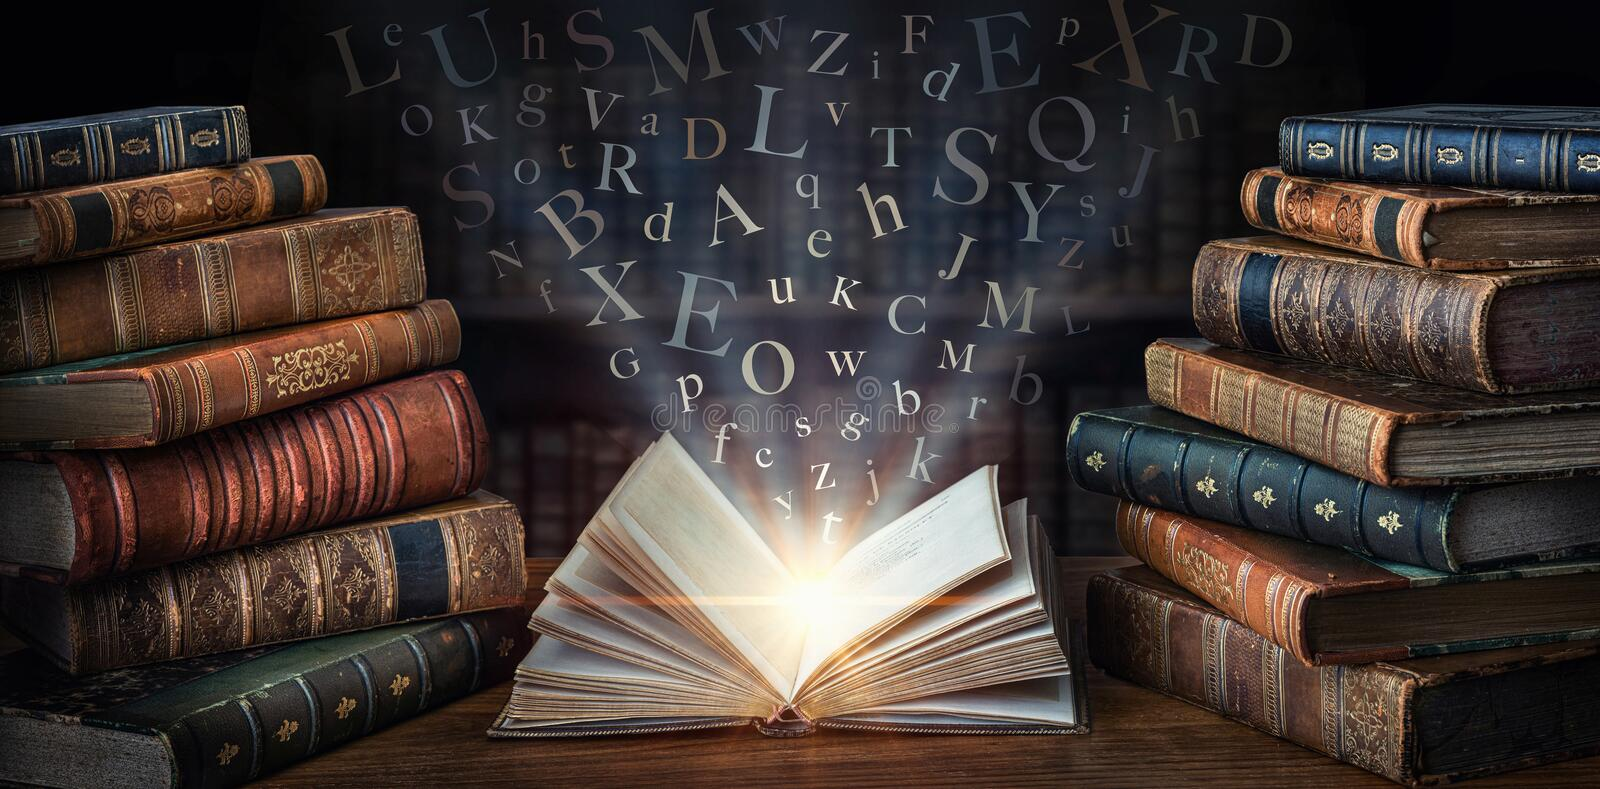

##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
##### **Team Member 1**-  $\color{green}{\text{Navneet Singh}}$


#<font size="+2" color='#053c96'><b> Problem Statement </b></font>

This is a Unsupervised Machine Learning Capstone Project. In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors.

The main objective is to create a book recommendation system for users.

#<font size="+2" color='#053c96'><b> GitHub Link </b></font>

https://github.com/Naveen-King/Book-Recommendation-System

#<font size="+2" color='#053c96'><b> Understanding the Data </b></font>

The Book-Crossing dataset comprises 3 files:

● Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

● Books

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

● Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

#<font size="+2" color='#053c96'><b> Project Workflow </b></font>

1. Importing Libraries

2. Loading the Dataset

3. Data Cleaning

4. Feature Engineering

5. EDA 

6. Building Recommender System

# **1. Importing Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from __future__ import print_function

In [ ]:
#importing the necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import nltk
import string
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Read in the datasets
df_books = pd.read_csv('/content/drive/MyDrive/Capstone Project/Books.csv')
df_ratings = pd.read_csv('/content/drive/MyDrive/Capstone Project/Books_Ratings.csv')
df_user = pd.read_csv('/content/drive/MyDrive/Capstone Project/Books_Users.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## **1. Preliminary Analysis**

### A) Removing the Duplicates in the Books Data Frame Before Mergeing

In [ ]:
#filling the missing values with 'Unknown'
df_books['Book-Author'].fillna('Unknown',inplace=True)

In [ ]:
# Define a function to combine to columns namely title and author
def change_title(str1,str2):
  '''Change the title of books'''
  str1 = str1 +" "+'by' +" "+str2
  return str1

In [ ]:
#shape of the dataframe before removing the duplicates
df_books.shape

(271360, 8)

In [ ]:
# Create a new column for title
df_books['new_title'] = df_books.apply(lambda x : change_title(x['Book-Title'],x['Book-Author']),axis = 1)

In [ ]:
# Get rid of duplications
df_books = df_books.drop_duplicates(subset='new_title',keep='first')

In [ ]:
#shape of the dataframe after removing the duplicates
df_books.shape

(251185, 9)

In [ ]:
271360-251185

20175

We can see that there were 20175 duplicates in books dataframe.

In [ ]:
# defining print as p
p=print

In [ ]:
#merging all the three dataset
df_merged = df_ratings.merge(df_books,how='inner',on='ISBN')
df_merged = df_merged.merge(df_user,how='inner',on='User-ID')

In [ ]:
df_merged.shape

(916933, 13)

In [ ]:
#adding a new column that measures the length of the title
df_merged['Title-Length'] = df_merged['Book-Title'].apply(len)
df_merged['Year-Of-Publication'] = pd.to_numeric(df_merged['Year-Of-Publication'], errors='coerce').fillna(2099, downcast = 'infer')

In [ ]:
#description of the features
df_merged.describe(include='all')

User-ID        ISBN    Book-Rating   Book-Title   Book-Author  \
count   916933.00000      916933  916933.000000       916933        916933   
unique           NaN      250075            NaN       241061        101587   
top              NaN  0971880107            NaN  Wild Animus  Nora Roberts   
freq             NaN        2502            NaN         2502          7645   
mean    140202.83165         NaN       2.825417          NaN           NaN   
std      80804.41894         NaN       3.848183          NaN           NaN   
min          2.00000         NaN       0.000000          NaN           NaN   
25%      69697.00000         NaN       0.000000          NaN           NaN   
50%     140410.00000         NaN       0.000000          NaN           NaN   
75%     211426.00000         NaN       7.000000          NaN           NaN   
max     278854.00000         NaN      10.000000          NaN           NaN   

        Year-Of-Publication         Publisher  \
count         916933.000000            916931   
unique                  NaN             16542   
top                     NaN  Ballantine Books   
freq                    NaN             30011   
mean            1968.353922               NaN   
std              230.251189               NaN   
min                0.000000               NaN   
25%             1991.000000               NaN   
50%             1997.000000               NaN   
75%             2001.000000               NaN   
max             2099.000000               NaN   

                                              Image-URL-S  \
count                                              916933   
unique                                             250074   
top     http://images.amazon.com/images/P/0971880107.0...   
freq                                                 2502   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                              Image-URL-M  \
count                                              916933   
unique                                             250074   
top     http://images.amazon.com/images/P/0971880107.0...   
freq                                                 2502   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                              Image-URL-L  \
count                                              916929   
unique                                             250071   
top     http://images.amazon.com/images/P/0971880107.0...   
freq                                                 2502   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                          new_title                  Location            Age  \
count                        916933                    916933  671659.000000   
unique                       250075                     21418            NaN   
top     Wild Animus by Rich Shapero  toronto, on

In [ ]:
#information of the features
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916933 entries, 0 to 916932
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              916933 non-null  int64  
 1   ISBN                 916933 non-null  object 
 2   Book-Rating          916933 non-null  int64  
 3   Book-Title           916933 non-null  object 
 4   Book-Author          916933 non-null  object 
 5   Year-Of-Publication  916933 non-null  int64  
 6   Publisher            916931 non-null  object 
 7   Image-URL-S          916933 non-null  object 
 8   Image-URL-M          916933 non-null  object 
 9   Image-URL-L          916929 non-null  object 
 10  new_title            916933 non-null  object 
 11  Location             916933 non-null  object 
 12  Age                  671659 non-null  float64
 13  Title-Length         916933 non-null  int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 104.9+ MB


In [ ]:
916933-671659

245274

### There are 245274 missing values in the age column.

In [ ]:
df_merged.loc[df_merged['ISBN'].str.endswith('X')].head(3)

User-ID        ISBN  Book-Rating  \
0    276725  034545104X            0   
1      2313  034545104X            5   
30     2313  080901548X            0   

                                           Book-Title  Book-Author  \
0                                Flesh Tones: A Novel   M. J. Rose   
1                                Flesh Tones: A Novel   M. J. Rose   
30  The Dark Child : The Autobiography of an Afric...  Camara Laye   

    Year-Of-Publication                  Publisher  \
0                  2002           Ballantine Books   
1                  2002           Ballantine Books   
30                 1954  Farrar, Straus and Giroux   

                                          Image-URL-S  \
0   http://images.amazon.com/images/P/034545104X.0...   
1   http://images.amazon.com/images/P/034545104X.0...   
30  http://images.amazon.com/images/P/080901548X.0...   

                                          Image-URL-M  \
0   http://images.amazon.com/images/P/034545104X.0...   
1   http://images.amazon.com/images/P/034545104X.0...   
30  http://images.amazon.com/images/P/080901548X.0...   

                                          Image-URL-L  \
0   http://images.amazon.com/images/P/034545104X.0...   
1   http://images.amazon.com/images/P/034545104X.0...   
30  http://images.amazon.com/images/P/080901548X.0...   

                                            new_title               Location  \
0                  Flesh Tones: A Novel by M. J. Rose      tyler, texas, usa   
1                  Flesh Tones: A Novel by M. J. Rose  cincinnati, ohio, usa   
30  The Dark Child : The Autobiography of an Afric...  cincinnati, ohio, usa   

     Age  Title-Length  
0    NaN            20  
1   23.0            20  
30  23.0            52

## **Conclusion**: Some titles have same ISBN.

## B) Unique Book Titles

In [ ]:
len(df_merged['Book-Title'].unique())

241061

## C) Unique ISBNs

In [ ]:
len(df_merged['ISBN'].unique())

250075

## D) Unique Users


In [ ]:
len(df_merged['User-ID'].unique())

85504

## E) Publication Years

In [ ]:
df_merged['Year-Of-Publication'].unique()

array([2002, 1994, 1996, 1998, 2001, 1987, 1984, 1997, 1970, 1978, 1993,
       1989, 1995, 1990, 1992, 1950, 1991, 1999, 1954, 1988, 2003, 2004,
       2000, 1983, 1985, 1982, 1956, 1979, 1986, 1975,    0, 1976, 1977,
       1980, 1981, 1974, 1957, 1958, 1960, 1963, 1969, 1972, 1961, 1971,
       1953, 1968, 1973, 1967, 1962, 1937, 1959, 1955, 2005, 1945, 1965,
       1964, 1927, 2020, 2050, 1920, 1966, 1952, 1930, 1940, 1942, 1947,
       1925, 1923, 2030, 1951, 1936, 1946, 1943, 2099, 1928, 1941, 2011,
       1948, 1901, 1932, 1939, 1944, 1938, 1902, 1929, 1900, 1911, 1949,
       1926, 1933, 1922, 1897, 2026, 1906, 1806, 1935, 2006, 2037, 1921,
       2024, 2038, 1924, 1378, 2008, 1934, 1909, 1931, 1904, 1917, 2012,
       1914, 1376, 1908, 1919])

## **Observation:-** We can clearly see that their are some noise values in the Year of Publication features :-
### 1. **String Noise Values -** such as 'DK Publishing Inc' and 'Gallimard.
### 2. **Integer Noise Values -** Since this data was collected in august 2004, so any year value greater than 2004 is a noise value.

In [ ]:
len(df_merged['Publisher'].unique())

16543

# **2. Preprocessing and Feature Engineering**

## 1. Location

In [ ]:
# defining a function to extarct the country names
def get_country(x):
  return x.split(',')[-1]

In [ ]:
#applying the function the location column
df_location = df_user.copy(deep=True)
df_location['country'] = df_user['Location'].apply(get_country)

In [ ]:
df_merged['Location'] = df_merged['Location'].apply(get_country)

Extracted just the country names from the location column.

## 2. Age

### a) Creating bins for the age column.

In [ ]:
# Create age groups using age column
bins = [-1,12,20,50,100]
labels = ['Kid','Teenager','Adult','Old']
df_merged['age_bins'] = pd.cut(x=df_merged['Age'], bins=bins,labels=labels)

### Labelled 'Kid' for values between between 1-12
### 'Teenager' for values between 13-19
### 'Adult' for values between 20-50
### 'Old' for values greater than 50

### b) Capping Outlier



In [ ]:
# Number of outliers
outliers = sum(df_merged['Age']>90)
print(outliers)

2872


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


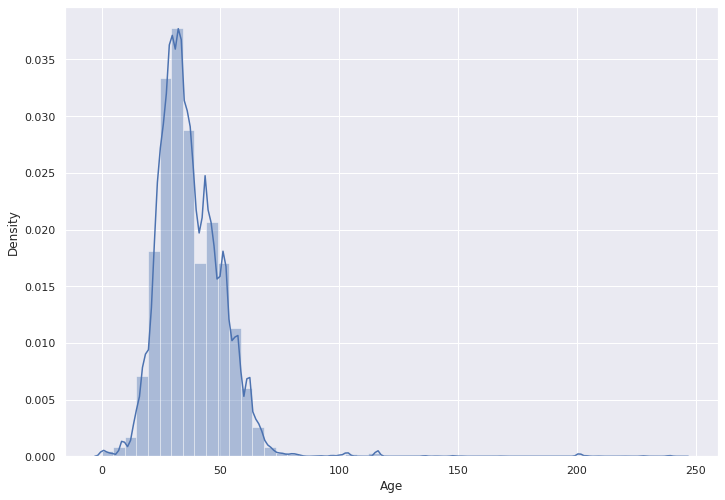

In [ ]:
# Plot Distribution of Age
sns.distplot(df_merged['Age'].dropna())
# Handling outliers by randomly replacing age >90 by values between 90 and 100
age2 = df_merged['Age'].copy()
random_age2 = np.random.randint(90,100,outliers)
age2[df_merged['Age']>90]=random_age2
df_merged['Age'] = age2

##3.Handling Missing Value

In [ ]:
# Missing Value Count Function
def show_missing(y):
    missing = y.columns[y.isnull().any()].tolist()
    return missing

def print_missing(x):
  # Missing data counts and percentage
  print('Missing Data Count')
  print(x[show_missing(x)].isnull().sum().sort_values(ascending = False))
  print('--'*50)
  print('Missing Data Percentage')
  print(round(x[show_missing(x)].isnull().sum().sort_values(ascending = False)/len(x)*100,2))

### Missing values for different features

In [ ]:
print_missing(df_user)

Missing Data Count
Age    110762
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Age    39.72
dtype: float64


In [ ]:
print_missing(df_location)

Missing Data Count
Age    110762
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Age    39.72
dtype: float64


In [ ]:
print_missing(df_merged)

Missing Data Count
age_bins       247826
Age            245274
Image-URL-L         4
Publisher           2
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
age_bins       27.03
Age            26.75
Image-URL-L     0.00
Publisher       0.00
dtype: float64


###a) Dealing with the missing values of age.

In [ ]:
# Null values in age column
nulls = sum(df_merged['Age'].isnull())
print('Null values in Age: ',nulls)

Null values in Age:  245274


In [ ]:
# Replacing null values
median = df_merged['Age'].median()
std = df_merged['Age'].std()
random_age = np.random.randint(median - std, median + std, size = nulls)
age = df_merged['Age'].copy()
age[pd.isnull(age)] = random_age
df_merged['Age'] = age
df_merged['Age'] = df_merged['Age'].astype(int)

In [ ]:
df_merged.shape

(916933, 15)

## 4. Calculating the Rating Count and Rating Mean for each Book-Title

In [ ]:
# Calculating the rating count and mean rating given to each book by the user.

rating_count = df_merged.groupby('Book-Title')['Book-Rating'].count().to_frame()
rating_mean = df_merged.groupby('Book-Title')['Book-Rating'].mean().to_frame()

In [ ]:
# Renaming the column names before merging them with the final dataset.

rating_count.rename(columns={'Book-Rating':'Rating-Count'}, inplace=True)
rating_mean.rename(columns={'Book-Rating':'Rating-Mean'}, inplace=True)

In [ ]:
df_merged = pd.merge(df_merged, rating_count, on='Book-Title', how='inner')
df_merged = pd.merge(df_merged, rating_mean, on='Book-Title', how='inner')

In [ ]:
# rounding off the rating mean feature to 2 decimal points
df_merged['Rating-Mean'] = df_merged['Rating-Mean'].round(2)

In [ ]:
df_merged.drop(columns=['Image-URL-M','Image-URL-S','Image-URL-L'],inplace=True)

In [ ]:
df_merged.head(2)

User-ID        ISBN  Book-Rating            Book-Title Book-Author  \
0   276725  034545104X            0  Flesh Tones: A Novel  M. J. Rose   
1     2313  034545104X            5  Flesh Tones: A Novel  M. J. Rose   

   Year-Of-Publication         Publisher                           new_title  \
0                 2002  Ballantine Books  Flesh Tones: A Novel by M. J. Rose   
1                 2002  Ballantine Books  Flesh Tones: A Novel by M. J. Rose   

  Location  Age  Title-Length age_bins  Rating-Count  Rating-Mean  
0      usa   25            20      NaN            60         2.93  
1      usa   23            20    Adult            60         2.93

## 5.Using IMDB Formula to calculate the Weighted Rating for our books

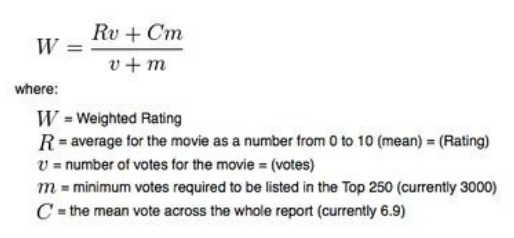

In [ ]:
# Calculating the mean vote across the whole df
C = df_merged['Rating-Mean'].mean()

In [ ]:
# Calculating the minimum votes required to be listed in the top 5%
m = rating_count.quantile(.95)[0]

In [ ]:
# IMDB formula; source: https://tutorialedge.net/python/building-imdb-top-250-clone-pandas/
def weighted_rating(x, m=m, C=C):
    v = x['Rating-Count']
    R = x['Rating-Mean']

    return (v/(v+m) * R) + (m/(m+v) * C)

## **Splitting the Dataset into Two Based on the Explicit and Implicit Ratings**

In [ ]:
df_merged_updated=df_merged[df_merged['Book-Rating']!=0]

In [ ]:
p(f" Implicit dataset has {df_merged.shape[0]-df_merged_updated.shape[0]} observations")
p(f" Explicit dataset has {df_merged_updated.shape[0]} observations")

 Implicit dataset has 576893 observations
 Explicit dataset has 340040 observations


In [ ]:
# Create relevant sub-dataset
df_top_10 = df_merged_updated.copy().loc[df_merged_updated['Rating-Count'] >= m]
df_top_10.shape

(163365, 14)

In [ ]:
df_top_10['Score'] = df_top_10.apply(weighted_rating, axis=1)

# **3. Exploratory Data Analysis**

##1. Ratings Count

### a) Explicit+Implicit Ratings

In [ ]:
rating_count=df_ratings['Book-Rating'].value_counts().reset_index().sort_values('Book-Rating',ascending=False)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Ratings Count')

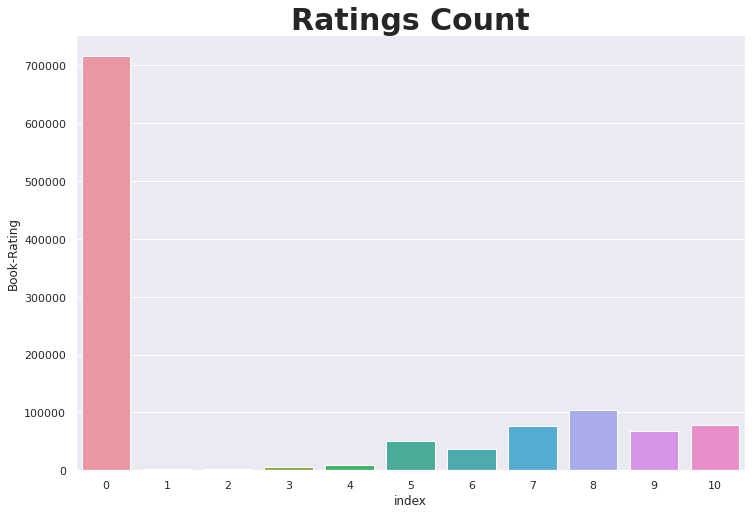

In [ ]:
plt.figure(figsize=(12,8))
ax=sns.barplot(rating_count['index'],rating_count['Book-Rating'])
ax.set_title('Ratings Count',fontsize=30,fontweight='bold')

### **Conclusion**: The datset with both explicit and implicit ratings is highly skewed toward the value of zero.

### b) Explicit Ratings

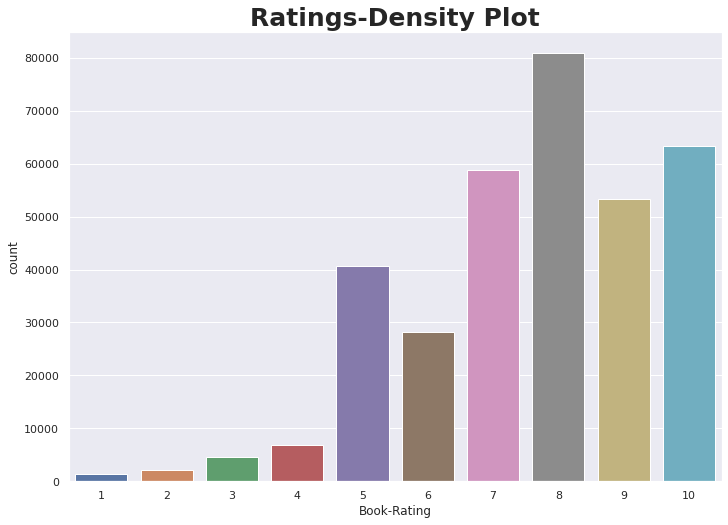

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# df_merged_updated = df_merged_updated[df_merged['Book-Rating']!=0]
sns.countplot(x='Book-Rating', data=df_merged_updated).set_title('Ratings-Density Plot', weight='bold').set_fontsize('25')

### **Conclusion**: The skewness perishes after we remove the implicit ratings.

## 2. Author V/S Ratings

In [ ]:
# ratings count per author
auth_rating=df_merged.groupby(['Book-Author'])['Book-Rating'].count().sort_values(ascending=False).reset_index()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

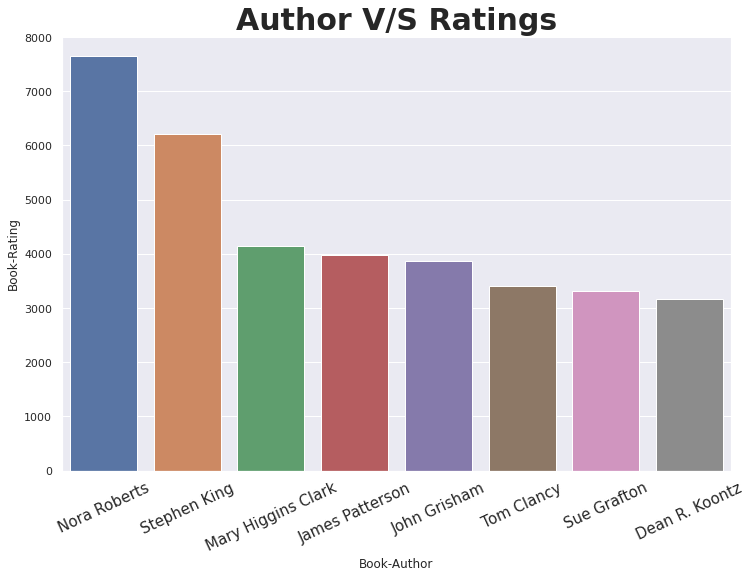

In [ ]:
plt.figure(figsize=(12,8))
ax=sns.barplot(auth_rating[auth_rating['Book-Rating']>3000]['Book-Author'],auth_rating[auth_rating['Book-Rating']>3000]['Book-Rating'])
ax.set_title('Author V/S Ratings', fontsize=30,fontweight='bold')
plt.xticks(fontsize=15,rotation=25)

*   ### Here, we can observe, most frequently rated Authors.
*   ### Most frequently rated author is Nora Roberts, followed by Stephen King.

## 3. Book Ratings Count

In [ ]:
#Book ratings count using group by
book_rating=df_merged.groupby(['Book-Title'])['Book-Rating'].count().sort_values(ascending=False).reset_index()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

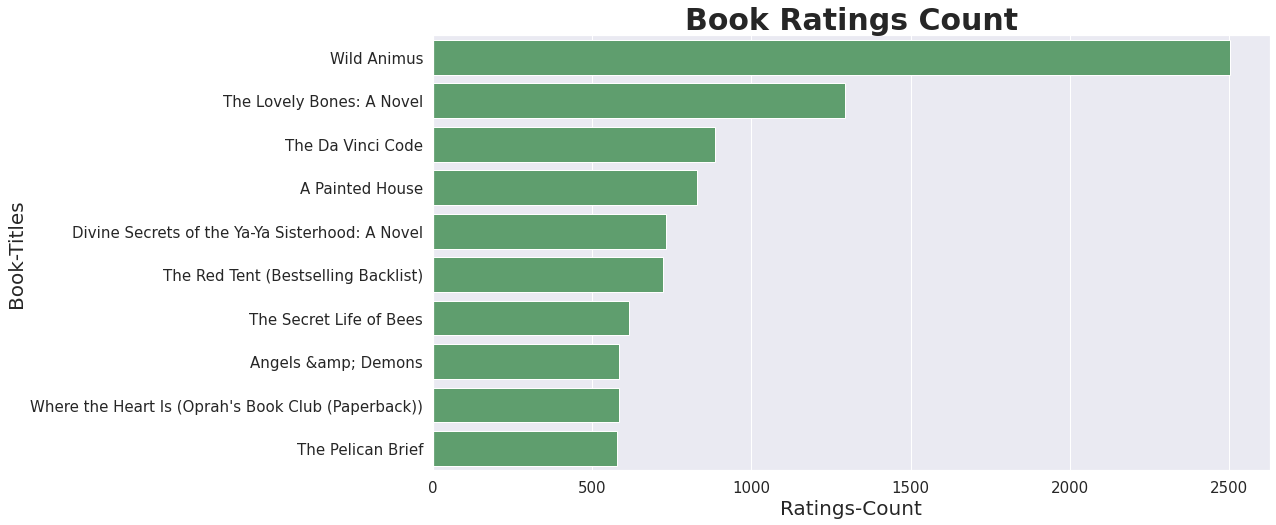

In [ ]:
plt.figure(figsize=(15,8))
ax=sns.barplot(book_rating['Book-Rating'][:10],book_rating['Book-Title'][:10],color='g')
ax.set_title('Book Ratings Count', fontsize=30,fontweight='bold')
ax.set_xlabel('Ratings-Count',fontsize=20)
ax.set_ylabel('Book-Titles',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)


*   ### Here, we are able to observe, most frequently rated books by the users.
*   ### Most frequently rated book, happens to be Wild Animuls.

## 4. Location

In [ ]:
#Identifying what % of customers are coming from different countries
df_location = pd.DataFrame(df_location.country.value_counts(normalize=True)).reset_index()
df_location.columns = ['countries','value_counts']

#Labeling countries with low customer % as other
df_location['countries'] = df_location.apply(lambda x: 'other' if (x['value_counts'] < 0.01 or x['countries'] == '') else x['countries'],axis=1)

#Grouping the customer % from 'other' countries 
df_location = df_location.groupby('countries')['value_counts'].sum().reset_index()

In [ ]:
#Every country has now just one occurance
df_location.countries.value_counts()

 australia         1
 canada            1
 france            1
 germany           1
 italy             1
 netherlands       1
 new zealand       1
 portugal          1
 spain             1
 united kingdom    1
 usa               1
other              1
Name: countries, dtype: int64

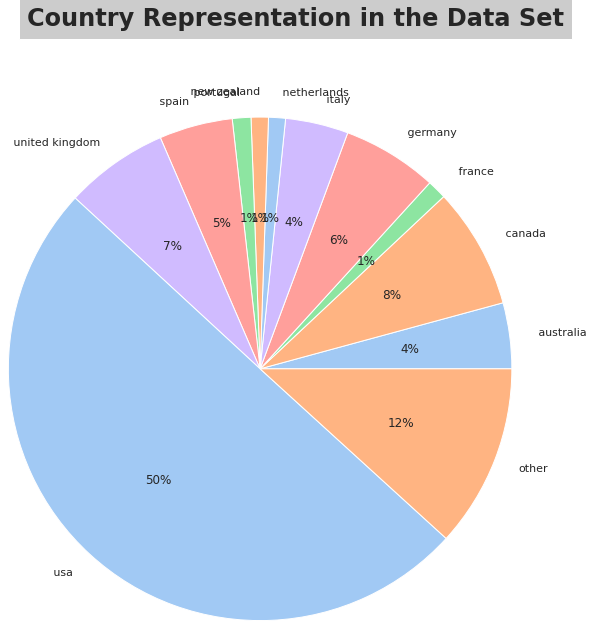

In [ ]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.title("Country Representation in the Data Set",bbox={'facecolor':'0.8', 'pad':8},fontsize=24, fontdict={"weight": "bold"},y=1.25,x=0.578)
f = plt.pie(df_location['value_counts'], labels = df_location['countries'], colors = colors, autopct='%.0f%%',radius=1.4)


*   ### Most customers are from United states of America, followd by Canada, United Kingdom and Germany.
*   ### Countries with less than 1% customers are labeled as other


## 4. Age vs Rating Density


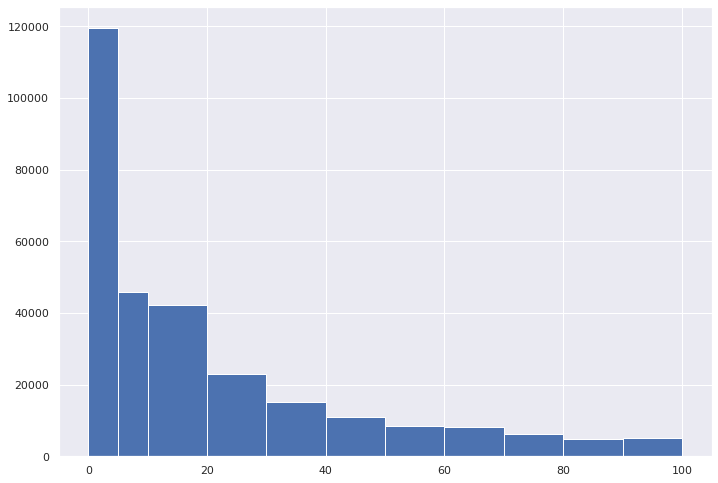

In [ ]:
# Visualizing the rating counts of the users. 
df_merged_updated['Rating-Count'].hist(bins=[0,5,10,20,30,40,50,60,70,80,90,100])

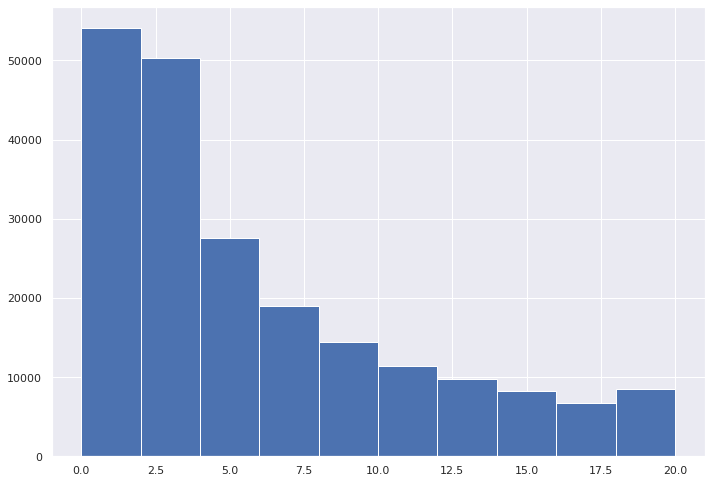

In [ ]:
# Visualizing the rating counts of the users in the range between 0 to 20. 
df_merged_updated['Rating-Count'].hist(bins=[0,2,4,6,8,10,12,14,16,18,20])

## **From this visualization it is evident that most books have been rated by 2 to 5 users only.**

## 5. Age Bin Representation

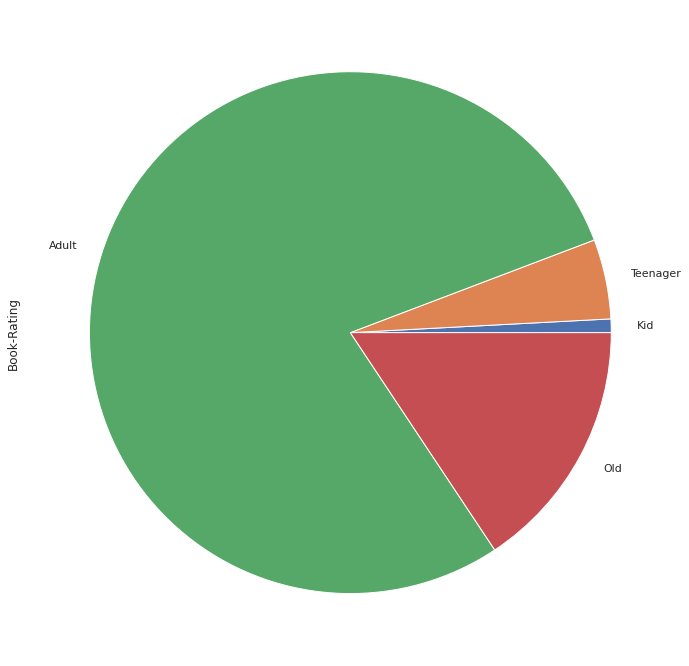

In [ ]:
# Age group that rated books the most
plt.figure(figsize=(20,12))
df_merged.groupby('age_bins')['Book-Rating'].count().plot(kind='pie')

*   ### Most customers are Adults (20-50yrs).
* ### 2nd most represented age group is for boomers (>50yrs).



In [ ]:
# Which country rates books the most
b1 = df_merged.groupby('Location')['Book-Rating'].count().sort_values(ascending=False).head(5)
b1

Location
 usa               660618
 canada             82214
 united kingdom     29795
 germany            26024
                    21364
Name: Book-Rating, dtype: int64

In [ ]:
# Implicit ratings i.e. Book-Rating = 0
b2 = df_merged[df_merged['Book-Rating']==0].\
groupby('Location')['Book-Rating'].count().sort_values(ascending=False).head(5)

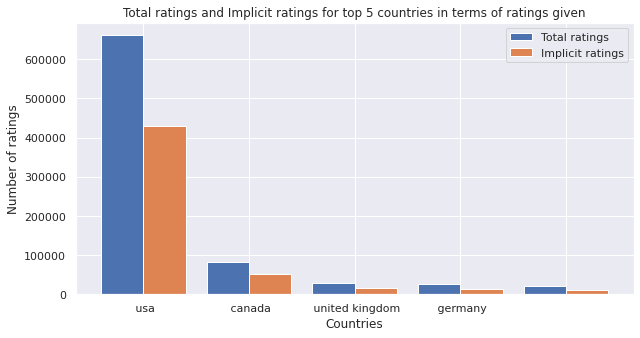

In [ ]:
# Bar plot for Rating comparison 
n= 5
X_axis = np.arange(n)
X = b1.index

plt.figure(figsize=(10,5))  
plt.bar(X_axis - 0.2, b1, 0.4, label = 'Total ratings')
plt.bar(X_axis + 0.2, b2, 0.4, label = 'Implicit ratings')
  
plt.xticks(X_axis, X)
plt.xlabel("Countries")
plt.ylabel("Number of ratings")
plt.title("Total ratings and Implicit ratings for top 5 countries in terms of ratings given")
plt.legend()
plt.show()

In [ ]:
# Most popular books for different age groups
age_bin_df = df_merged.groupby(['age_bins','Book-Title'])['Book-Rating'].count().sort_values(ascending=False).reset_index()
age_bin_df.rename(columns={'Book-Title':'Number of times rated'},inplace=True)

### **Note**: Users from each age category can be said to have some similar book preferences, we will later use Age as a relevance to recommend books for implicit ratings.

# **4. Preparing the Data for Model Building.**


### Here the Year-Of-Publication is in object Dtype, it should ideally be in  numeric Dtype. Let us explore this feature a bit more.

## 1. Cleaning the Feature - Year of Publication

In [ ]:
# Visually inspecting this feature by observing it's unique values.
df_merged_updated['Year-Of-Publication'].unique()

array([2002, 1994, 1996, 1998, 2001, 1987, 1984, 1997, 1970,    0, 1978,
       1993, 1989, 1995, 1990, 1957, 1992, 1950, 1991, 1999, 1954, 1988,
       2003, 2004, 1977, 2000, 1983, 1985, 1986, 1982, 1956, 1979, 1976,
       1981, 1980, 1974, 1958, 1960, 1963, 1969, 1971, 1973, 1972, 1961,
       1953, 1962, 1937, 1968, 1959, 1955, 2005, 1975, 1965, 1920, 1943,
       1964, 1967, 1927, 2020, 2050, 1952, 1966, 1930, 1940, 1942, 1946,
       1947, 1925, 1923, 2030, 1936, 1928, 1941, 1951, 1901, 2011, 1939,
       1945, 1932, 1902, 1929, 1911, 1949, 1926, 2026, 1906, 1806, 1933,
       1935, 1938, 2006, 2037, 1948, 2099, 2038, 1900, 1904, 1924, 1378,
       1934, 1944, 1931, 1376, 1908])

### Observation:-We can clearly see that their are some noice values in the Year of Publication features :-
### 1. String Noice Values - such as 'DK Publishing Inc' and 'Gallimard.
### 2. Integer Noice Values - Since this data was collected in august 2004, so any year value greater than 2004 is a noice value.

In [ ]:
# Casting Year-Of-Publication to numeric datatype and removing all String Noice Values using coerce functionality.

df_merged_updated['Year-Of-Publication'] = pd.to_numeric(df_merged_updated['Year-Of-Publication'], 'coerce')

<ipython-input-306-a07179142885>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_updated['Year-Of-Publication'] = pd.to_numeric(df_merged_updated['Year-Of-Publication'], 'coerce')


In [ ]:
# Cross checking the column to check if the string based noice values are removed or not.
df_merged_updated['Year-Of-Publication'].unique()

array([2002, 1994, 1996, 1998, 2001, 1987, 1984, 1997, 1970,    0, 1978,
       1993, 1989, 1995, 1990, 1957, 1992, 1950, 1991, 1999, 1954, 1988,
       2003, 2004, 1977, 2000, 1983, 1985, 1986, 1982, 1956, 1979, 1976,
       1981, 1980, 1974, 1958, 1960, 1963, 1969, 1971, 1973, 1972, 1961,
       1953, 1962, 1937, 1968, 1959, 1955, 2005, 1975, 1965, 1920, 1943,
       1964, 1967, 1927, 2020, 2050, 1952, 1966, 1930, 1940, 1942, 1946,
       1947, 1925, 1923, 2030, 1936, 1928, 1941, 1951, 1901, 2011, 1939,
       1945, 1932, 1902, 1929, 1911, 1949, 1926, 2026, 1906, 1806, 1933,
       1935, 1938, 2006, 2037, 1948, 2099, 2038, 1900, 1904, 1924, 1378,
       1934, 1944, 1931, 1376, 1908])

### Observaion: There are values like 2050, 2099 etc. which are not true.

In [ ]:
# Removing all the integer Noice Values from the Dataset.
df_merged_updated = df_merged_updated[(df_merged_updated['Year-Of-Publication']<=2006)]
df_merged_updated.head(2)

User-ID        ISBN  Book-Rating            Book-Title Book-Author  \
1     2313  034545104X            5  Flesh Tones: A Novel  M. J. Rose   
3     8680  034545104X            5  Flesh Tones: A Novel  M. J. Rose   

   Year-Of-Publication         Publisher                           new_title  \
1                 2002  Ballantine Books  Flesh Tones: A Novel by M. J. Rose   
3                 2002  Ballantine Books  Flesh Tones: A Novel by M. J. Rose   

  Location  Age  Title-Length age_bins  Rating-Count  Rating-Mean  
1      usa   23            20    Adult            60         2.93  
3      usa    2            20      Kid            60         2.93

In [ ]:
df_merged_updated['Year-Of-Publication'].unique()

array([2002, 1994, 1996, 1998, 2001, 1987, 1984, 1997, 1970,    0, 1978,
       1993, 1989, 1995, 1990, 1957, 1992, 1950, 1991, 1999, 1954, 1988,
       2003, 2004, 1977, 2000, 1983, 1985, 1986, 1982, 1956, 1979, 1976,
       1981, 1980, 1974, 1958, 1960, 1963, 1969, 1971, 1973, 1972, 1961,
       1953, 1962, 1937, 1968, 1959, 1955, 2005, 1975, 1965, 1920, 1943,
       1964, 1967, 1927, 1952, 1966, 1930, 1940, 1942, 1946, 1947, 1925,
       1923, 1936, 1928, 1941, 1951, 1901, 1939, 1945, 1932, 1902, 1929,
       1911, 1949, 1926, 1906, 1806, 1933, 1935, 1938, 2006, 1948, 1900,
       1904, 1924, 1378, 1934, 1944, 1931, 1376, 1908])

In [ ]:
# The percentage of Data lost while cleaning the Year-of_publication Feature.
percentage_of_data_lost = (340040 - df_merged_updated.shape[0])*100/340040
percentage_of_data_lost

0.008528408422538524

### **Therefore, after cleaning the dataset based upon Year-Of-Publication Feature, we lost only a miniscule amount of 0.8% data.**

## 2. Selecting Books with Optimum Number of Ratings

* ### As we all know that building any recommendation system requires a lot of data. Recommendations should be relevant otherwise they can cause a nuisance to the customers. 
* ### So, we have set a threshold number of ratings per book in order to get optimal recommendations for our users.

In [ ]:
# counting the ratings per ISBN
books_reduce=df_merged_updated.groupby(['ISBN'])['Book-Rating'].count().reset_index().sort_values('Book-Rating',ascending=False)

In [ ]:
#Considering all the counts greater than 10
reduced_books=books_reduce[books_reduce['Book-Rating']>10]['ISBN']

In [ ]:
#merging it with the original dataset
df_merged_updated=df_merged_updated.merge(reduced_books,how='inner',left_on='ISBN',right_on='ISBN')

In [ ]:
df_merged_updated.shape

(112927, 14)

## 3. Defining the Optimum Book reader

*   ### We can't take every user's rating at facevalue because if the user is a novice reader with only an experience of reading a couple of books, his/her ratings might not be much relevant for finding similarity among books.

* ### Therefore as a general rule of thumb we choosing only those User's who have rated atleast 15 Books for builing the recommendation system.

In [ ]:
# Size of dataset rows before the User selection operation.
df_size_before_removing_Novice_readers = df_merged_updated.shape[0]
df_size_before_removing_Novice_readers

112927

In [ ]:
# Storing the value counts of User-ID's in a new variable named counts1
counts1 = df_merged_updated['User-ID'].value_counts()

# Removing the User-ID's which have rated less than 10 books.
df_merged_updated= df_merged_updated[df_merged_updated['User-ID'].isin(counts1[counts1 >=10].index)].reset_index()
df_merged_updated.drop(columns='index', inplace=True)

In [ ]:
df_merged_updated.shape

(51937, 14)

In [ ]:
# Size of dataset rows after the User selection operation.
df_size_after_removing_Novice_readers = df_merged_updated.shape[0]
df_size_after_removing_Novice_readers

51937

In [ ]:
df_merged_updated.shape

(51937, 14)

# **5. Building Models**

## **1. Popularity Based Recommender System**



In [ ]:
#Merging Books and Ratings dataframes
ratings_with_name = df_ratings.merge(df_books,on='ISBN')

In [ ]:
#Counting number of rating for each book
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

Book-Title  num_ratings
0        A Light in the Storm: The Civil War Diary of ...            4
1                                   Always Have Popsicles            1
2                    Apple Magic (The Collector's series)            1
3        Ask Lily (Young Women of Faith: Lily Series, ...            1
4        Beyond IBM: Leadership Marketing and Finance ...            1
...                                                   ...          ...
241056                                      Ã?Â?lpiraten.            2
241057                     Ã?Â?rger mit Produkt X. Roman.            4
241058                                Ã?Â?sterlich leben.            1
241059                              Ã?Â?stlich der Berge.            3
241060                                  Ã?Â?thique en toc            2

[241061 rows x 2 columns]

In [ ]:
#Calculating average rating for each book
avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

Book-Title  avg_rating
0        A Light in the Storm: The Civil War Diary of ...    2.250000
1                                   Always Have Popsicles    0.000000
2                    Apple Magic (The Collector's series)    0.000000
3        Ask Lily (Young Women of Faith: Lily Series, ...    8.000000
4        Beyond IBM: Leadership Marketing and Finance ...    0.000000
...                                                   ...         ...
241056                                      Ã?Â?lpiraten.    0.000000
241057                     Ã?Â?rger mit Produkt X. Roman.    5.250000
241058                                Ã?Â?sterlich leben.    7.000000
241059                              Ã?Â?stlich der Berge.    2.666667
241060                                  Ã?Â?thique en toc    4.000000

[241061 rows x 2 columns]

In [ ]:
#Merging num_rating and avg_rating dataframes on Book-Title column
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

Book-Title  num_ratings  \
0        A Light in the Storm: The Civil War Diary of ...            4   
1                                   Always Have Popsicles            1   
2                    Apple Magic (The Collector's series)            1   
3        Ask Lily (Young Women of Faith: Lily Series, ...            1   
4        Beyond IBM: Leadership Marketing and Finance ...            1   
...                                                   ...          ...   
241056                                      Ã?Â?lpiraten.            2   
241057                     Ã?Â?rger mit Produkt X. Roman.            4   
241058                                Ã?Â?sterlich leben.            1   
241059                              Ã?Â?stlich der Berge.            3   
241060                                  Ã?Â?thique en toc            2   

        avg_rating  
0         2.250000  
1         0.000000  
2         0.000000  
3         8.000000  
4         0.000000  
...            ...  
241056    0.000000  
241057    5.250000  
241058    7.000000  
241059    2.666667  
241060    4.000000  

[241061 rows x 3 columns]

In [ ]:
#Sorting top 50 books those who have received more than 250 ratings and highest average ratings
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [ ]:
popular_df = popular_df.merge(df_books,on='Book-Title')
popular_df

Book-Title  num_ratings  \
0   Harry Potter and the Order of the Phoenix (Boo...          334   
1   The Hobbit : The Enchanting Prelude to The Lor...          281   
2                               To Kill a Mockingbird          389   
3   Harry Potter and the Sorcerer's Stone (Harry P...          571   
4   The Fellowship of the Ring (The Lord of the Ri...          323   
..                                                ...          ...   
58                         Interview with the Vampire          506   
59                                1st to Die: A Novel          391   
60  She's Come Undone (Oprah's Book Club (Paperback))          446   
61                                  Two for the Dough          267   
62                                The Handmaid's Tale          273   

    avg_rating        ISBN      Book-Author Year-Of-Publication  \
0     5.571856  043935806X    J. K. Rowling                2003   
1     5.007117  0345339681   J.R.R. TOLKIEN                1986   
2     4.920308  0446310786       Harper Lee                1988   
3     4.900175  059035342X    J. K. Rowling                1999   
4     4.885449  0345339703   J.R.R. TOLKIEN                1986   
..         ...         ...              ...                 ...   
58    3.535573  0345337662        Anne Rice                1993   
59    3.498721  0446610038  James Patterson                2002   
60    3.495516  0671003755       Wally Lamb                1996   
61    3.464419  0671001795  Janet Evanovich                1996   
62    3.454212  0449212602  Margaret Atwood                1989   

                     Publisher  \
0                   Scholastic   
1                      Del Rey   
2   Little Brown &amp; Company   
3       Arthur A. Levine Books   
4                      Del Rey   
..                         ...   
58            Ballantine Books   
59               Warner Vision   
60     Washington Square Press   
61                      Pocket   
62               Fawcett Books   

                                          Image-URL-S  \
0   http://images.amazon.com/images/P/043935806X.0...   
1   http://images.amazon.com/images/P/0345339681.0...   
2   http://images.amazon.com/images/P/0446310786.0...   
3   http://images.amazon.com/images/P/059035342X.0...   
4   http://images.amazon.com/images/P/0345339703.0...   
..                                                ...   
58  http://images.amazon.com/images/P/0345337662.0...   
59  http://images.amazon.com/images/P/0446610038.0...   
60  http://images.amazon.com/images/P/0671003755.0...   
61  http://images.amazon.com/images/P/0671001795.0...   
62  http://images.amazon.com/images/P/0449212602.0...   

                                          Image-URL-M  \
0   http://images.amazon.com/images/P/043935806X.0...   
1   http://images.amazon.com/images/P/0345339681.0...   
2   http://images.amazon.com/images/P/0446310786.0...   
3   http://images.amazon.com/images/P/059035342X.0...   
4   http://images.amazon.com/images/P/0345339703.0...   
..                                                ...   
58  http://images.amazon.com/images/P/0345337662.0...   
59  http://images.amazon.com/images/P/0446610038.0...   
60  http://images.amazon.com/images/P/0671003755.0...   
61  http://images.amazon.com/images/P/0671001795.0...   
62  http://images.amazon.com/images/P/0449212602.0...   

                                          Image-URL-L  \
0   http://images.amazon.com/images/P/043935806X.0...   
1   http://images.amazon.com/images/P/0345339681.0...   
2   http://images.amazon.com/images/P/0446310786.0...   
3   http://images.amazon.com/images/P/059035342X.0...   
4   http://images.amazon.com/images/P/0345339703.0...   
..                                                ...   
58  http://images.amazon.com/images/P/0345337662.0...   
59  http://images.amazon.com/images/P/0446610038.0...   
60  http://images.amazon.com/images/P/0671003755.0...   
61  http://images.amazon.com/images/P/0671001795

## **2. Collaborative Filtering Based Recommender System (User Based)**

In [ ]:
#Selecting users who have given more than 200 ratings
#Merging Books and Ratings dataframes
ratings_with_name = df_ratings.merge(df_books,on='ISBN')
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
reliable_users = x[x].index

In [ ]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(reliable_users)]

In [ ]:
#Selecting top 50 books with highest number of rating 
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [ ]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [ ]:
#Applying Pivot table on final_ratings dataframe
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [ ]:
users_ids = list(pt.index)
users_ids[:5]

['1st to Die: A Novel',
 '4 Blondes',
 'A Case of Need',
 'A Child Called \\It\\": One Child\'s Courage to Survive"',
 'A Civil Action']

In [ ]:
pt.fillna(0,inplace=True)
pt

User-ID                                             254     2276    2766    \
Book-Title                                                                   
1st to Die: A Novel                                    0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Case of Need                                         0.0     0.0     0.0   
A Child Called \It\": One Child's Courage to Su...     0.0     0.0     0.0   
A Civil Action                                         0.0     0.0     0.0   
...                                                    ...     ...     ...   
Year of Wonders                                        0.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

User-ID                                             2977    3363    4385    \
Book-Title                                                                   
1st to Die: A Novel                                    0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Case of Need                                         0.0     0.0     0.0   
A Child Called \It\": One Child's Courage to Su...     0.0     0.0     0.0   
A Civil Action                                         0.0     0.0     0.0   
...                                                    ...     ...     ...   
Year of Wonders                                        7.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

User-ID                                             6251    6323    6543    \
Book-Title                                                                   
1st to Die: A Novel                                    0.0     0.0     9.0   
4 Blondes                                              0.0     0.0     0.0   
A Case of Need                                         0.0     0.0     0.0   
A Child Called \It\": One Child's Courage to Su...     0.0     0.0     0.0   
A Civil Action                                         0.0     0.0     0.0   
...                                                    ...     ...     ...   
Year of Wonders                                        0.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

User-ID                                             6575    ...  271705  \
Book-Title                                                  ...           
1st to Die: A Novel                                    0.0  ...     0.0   
4 Blondes                                              0.0  ...     0.0   
A Case of Need                                         0.0  ...     0.0   
A Child Called \It\": One Child's Courage to Su...     0.0  ...     0.0   
A Civil Action                                         0.0  ...     0.0   
...                                                    ...  ...     ...   
Year of Wonders                                        0.0  ...     0.0   
You Belong To Me                                       0.0  ...     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0  ...     0.0   
Zoya                                                   0.0  ...     0.0   
\O\" Is for Outlaw"                                    

In [ ]:
#Applying cosine_similarity to pivot table
similarity_scores = cosine_similarity(pt)
similarity_scores.shape

(409, 409)

In [ ]:
#Building recommender system
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = df_books[df_books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Year-Of-Publication'].values.astype(int)))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [ ]:
recommend('Harry Potter and the Order of the Phoenix (Book 5)')

[['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  2000,
  'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  1999,
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  1999,
  'http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg'],
 ['A Wrinkle In Time',
  "MADELEINE L'ENGLE",
  1998,
  'http://images.amazon.com/images/P/0440498058.01.MZZZZZZZ.jpg']]

## **Singular Value Decomposition**

In [ ]:
from scipy.sparse.linalg import svds
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(pt, k = NUMBER_OF_FACTORS_MF)

In [ ]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[-0.59768582,  0.04216288, -0.05703054, ...,  0.47596526,
         0.25120894,  0.14537382],
       [-0.01475727,  0.06159774,  0.13875482, ..., -0.01380264,
         0.03161906, -0.00138669],
       [-0.09194713,  0.21350239,  0.05029209, ...,  0.09579967,
         0.28211644, -0.05112645],
       ...,
       [ 0.37956128,  0.15406844,  0.43416758, ...,  0.20401527,
        -0.08539938,  0.25986992],
       [ 0.01027671,  0.0219068 , -0.19610455, ...,  0.32680078,
         0.2375498 ,  0.04988312],
       [-0.02128555,  0.19485755, -0.06073108, ...,  0.43593567,
         0.0489773 ,  0.02765055]])

In [ ]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pt.columns, index=users_ids).transpose()
cf_preds_df.head(5)

1st to Die: A Novel  4 Blondes  A Case of Need  \
User-ID                                                   
254                -0.597686  -0.014757       -0.091947   
2276                0.042163   0.061598        0.213502   
2766               -0.057031   0.138755        0.050292   
2977                0.070959   0.090973        0.047827   
3363                0.347453   0.028483        0.005967   

         A Child Called \It\": One Child's Courage to Survive"  \
User-ID                                                          
254                                               0.202038       
2276                                              0.109446       
2766                                              0.699704       
2977                                              0.171782       
3363                                              0.262293       

         A Civil Action  A Great Deliverance  \
User-ID                                        
254           -0.192892            -0.069376   
2276           0.022265             0.140995   
2766           0.264614            -0.122187   
2977           0.036295             0.006725   
3363           0.090659             0.036903   

         A Heartbreaking Work of Staggering Genius  \
User-ID                                              
254                                      -0.306112   
2276                                     -0.025951   
2766                                      0.833997   
2977                                      0.253695   
3363                                      0.136757   

         A Is for Alibi (Kinsey Millhone Mysteries (Paperback))  \
User-ID                                                           
254                                               0.022369        
2276                                              0.166548        
2766                                              0.857249        
2977                                              0.334525        
3363                                             -0.010474        

         A Lesson Before Dying (Vintage Contemporaries (Paperback))  \
User-ID                                                               
254                                              -0.043412            
2276                                              0.109300            
2766                                              0.275032            
2977                                              0.046006            
3363                                              0.118826            

         A Painted House  ...  Whispers  \
User-ID                   ...             
254            -0.143212  ...  0.027039   
2276            0.977368  ...  0.078693   
2766           -0.012507  ...  0.325923   
2977            0.239649  ... -0.003798   
3363            0.219196  ...  0.212628   

         White Oleander : A Novel (Oprah's Book Club)  \
User-ID                                                 
254                                          0.196148   
2276                                        -0.159864   
2766                                         0.674224   
2977                                         0.099709   
3363                                         0.030197   

         Wicked: The Life and Times of the Wicked Witch of the West  \
User-ID                                                               
254                                               0.245845            
2276                                              0.206119            
2766                                              0.532344            
2977                                              0.103983            
3363                                             -0.086981            

         Wild Animus  Without Remorse  Year of Wonders  You Belong To Me  \
User-ID                                                                    
254         0.063398        -0.019603        -0.333287          0.181439   
2276        0.122054

In [ ]:
df_merged_updated[df_merged_updated['User-ID']==40943].head()

User-ID        ISBN  Book-Rating  \
2283     40943  0385730586           10   
2552     40943  0061020710            9   
2703     40943  0312288115            1   
4936     40943  0743418174           10   
10041    40943  0440940001           10   

                                              Book-Title      Book-Author  \
2283                   Sisterhood of the Traveling Pants    ANN BRASHARES   
2552                                  The Color of Magic  Terry Pratchett   
2703   Confessions of a Sociopathic Social Climber : ...       Adele Lang   
4936                                         Good in Bed  Jennifer Weiner   
10041    Island of the Blue Dolphins (Laurel Leaf Books)     Scott O'Dell   

       Year-Of-Publication                          Publisher  \
2283                  2003  Delacorte Books for Young Readers   
2552                  2000                        HarperTorch   
2703                  2002                 Thomas Dunne Books   
4936                  2002            Washington Square Press   
10041                 1978                         Laure Leaf   

                                               new_title Location  Age  \
2283   Sisterhood of the Traveling Pants by ANN BRASH...      usa   40   
2552               The Color of Magic by Terry Pratchett      usa   40   
2703   Confessions of a Sociopathic Social Climber : ...      usa   40   
4936                      Good in Bed by Jennifer Weiner      usa   40   
10041  Island of the Blue Dolphins (Laurel Leaf Books...      usa   40   

       Title-Length age_bins  Rating-Count  Rating-Mean  
2283             33    Adult           130         3.87  
2552             18    Adult           103         3.19  
2703            119    Adult            66         1.59  
4936             11    Adult           470         4.04  
10041            47    Adult            90         3.82

* ## We can see, the user: **40943**, has rated **Sisterhood of the Traveling Pants**, very highly. Our model, is recommending other parts of the same series. This seems to be consistent with high precision and high recall values that we have obtained thus far.

# **Exporting Data through pickle for creating webpage**

In [ ]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [ ]:
df_books.drop_duplicates('Book-Title')

ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271354  0449906736      Flashpoints: Promise and Peril in a New World   
271356  0525447644                            From One to One Hundred   
271357  006008667X  Lily Dale : The True Story of the Town that Ta...   
271358  0192126040                        Republic (World's Classics)   
271359  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                 Book-Author Year-Of-Publication  \
0         Mark P. O. Morford                2002   
1       Richard Bruce Wright                2001   
2               Carlo D'Este                1991   
3           Gina Bari Kolata                1999   
4            E. J. W. Barber                1999   
...                      ...                 ...   
271354          Robin Wright                1993   
271356            Teri Sloat                1991   
271357      Christine Wicker                2004   
271358                 Plato                1996   
271359   Christopher  Biffle                2000   

                                               Publisher  \
0                                Oxford University Press   
1                                  HarperFlamingo Canada   
2                                        HarperPerennial   
3                                   Farrar Straus Giroux   
4                             W. W. Norton &amp; Company   
...                                                  ...   
271354                                  Ballantine Books   
271356                                      Dutton Books   
271357                                HarperSanFrancisco   
271358                           Oxford University Press   
271359  McGraw-Hill Humanities/Social Sciences/Languages   

                                              Image-URL-S  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
271354  http://images.amazon.com/images/P/0449906736.0...   
271356  http://images.amazon.com/images/P/0525447644.0...   
271357  http://images.amazon.com/images/P/006008667X.0...   
271358  http://images.amazon.com/images/P/0192126040.0...   
271359  http://images.amazon.com/images/P/0767409752.0...   

                                              Image-URL-M  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
271354  http://images.amazon.com/images/P/0449906736.0...   
271356  http://images.amazon.com/images/P/0525447644.0...   
271357  http://images.amazon.com/images/P/006008667X.0...   
271358  http://images.amazon.com/images/P/0192126040.0...   
271359  http://images.amazon.com/images/P/0767409752.0...   

                                              Image-URL-L  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://image

In [ ]:
#Exporting data for webpage
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(df_books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))